In [1]:
#@title Data Analyst Assessment
import pandas as pd

In [2]:
df = pd.read_excel('social_data.xlsx', dtype={'Account': str, 'Account Type': str, 'Campaign Name': str,'Total Impressions': int,'Total Engagements': int,'Media Type': str})

In [3]:
#@title Cleaning

#Lets clean up the white spaces in Account Column
df['Account'] = df['Account'].str.strip()

1.What is the typical engagement rate we can expect? What’s the likelihood that we can
achieve a 15% engagement rate?

Typical Engagement Rate is 40.49%.
The likelihood that we can achieve a 15% engagement rate is 6.50%

In [4]:
engagement_rate = (df['Total Engagements'] / df['Total Impressions']) * 100
typical_engagement_rate = engagement_rate.mean()
likelihood_15_percent = (engagement_rate >= 15).mean() * 100

print("Typical engagement rate: {:.2f}%".format(typical_engagement_rate))
print("Likelihood of achieving a 15% engagement rate: {:.2f}%".format(likelihood_15_percent))


Typical engagement rate: 40.49%
Likelihood of achieving a 15% engagement rate: 6.50%


In [5]:
import plotly.graph_objects as go

# Calculate engagement rate
engagement_rate = (df['Total Engagements'] / df['Total Impressions']) * 100

# Calculate typical engagement rate and likelihood of achieving 15% engagement rate
typical_engagement_rate = engagement_rate.mean()
likelihood_15_percent = (engagement_rate >= 15).mean() * 100

# Create a bar chart
fig = go.Figure(data=[
    go.Bar(x=['Typical Engagement Rate', 'Likelihood of 15% Engagement Rate'],
           y=[typical_engagement_rate, likelihood_15_percent],
           marker_color=['blue', 'orange'])
])

# Add annotations for labels
fig.add_annotation(x='Typical Engagement Rate', y=typical_engagement_rate,
                   text="{:.2f}%".format(typical_engagement_rate),
                   showarrow=False, font=dict(size=14))

fig.add_annotation(x='Likelihood of 15% Engagement Rate', y=likelihood_15_percent,
                   text="{:.2f}%".format(likelihood_15_percent),
                   showarrow=False, font=dict(size=14))

fig.update_layout(title='Engagement Rate Analysis',
                  xaxis_title='Metrics',
                  yaxis_title='Percentage',
                  showlegend=False)

fig.show()


2. Does day of the week and time of posting affect engagement rates?


Yes, the day of the week and timing affect engagement rate. We see huge spike in engagement rate on Fridays and at 12 pm during the day.

In [6]:
df['Day of Week'] = df['Published Date'].dt.day_name()
df['Hour'] = df['Published Date'].dt.hour

# Calculate engagement rate
df['Engagement Rate'] = (df['Total Engagements'] / df['Total Impressions']) * 100

# Calculate average engagement rate by day of the week and hour of the day
engagement_rate_by_day = df.groupby('Day of Week')['Engagement Rate'].mean()
engagement_rate_by_hour = df.groupby('Hour')['Engagement Rate'].mean()

print("Average Engagement Rate by day of the week:\n", engagement_rate_by_day)
print("\nAverage Engagement Rate by hour of the day:\n", engagement_rate_by_hour)



Average Engagement Rate by day of the week:
 Day of Week
Friday       166.037491
Monday         4.517345
Saturday       3.779530
Sunday         5.897657
Thursday       9.840649
Tuesday        6.535451
Wednesday      4.453678
Name: Engagement Rate, dtype: float64

Average Engagement Rate by hour of the day:
 Hour
0            NaN
2       0.840156
3       5.656221
4       5.575346
5      11.488999
6      20.786356
7       6.656849
8       7.409689
9       6.166991
10      4.763516
11      9.104223
12    396.696227
13      4.912188
14      5.046390
15      4.520424
16      5.320484
17      5.337955
18      4.557921
19      4.359814
20      4.787907
21      6.089147
22      2.059433
23      2.859394
Name: Engagement Rate, dtype: float64


In [7]:
import plotly.express as px

# Plotting engagement by day of the week
fig1 = px.bar(engagement_rate_by_day, x=engagement_rate_by_day.index, y='Engagement Rate',
              labels={'Engagement Rate': 'Average Engagements'}, color='Engagement Rate')
fig1.update_layout(title='Engagement by Day of the Week', xaxis_title='Day of the Week', yaxis_title='Average Engagements')
fig1.show()




In [8]:

# Plotting engagement by hour of the day
fig2 = px.line(x=engagement_rate_by_hour.index, y=engagement_rate_by_hour.values,
               labels={'x': 'Hour of the Day (12-hour format)', 'y': 'Average Engagements'},
               title='Engagement by Hour of the Day')
fig2.update_xaxes(tickmode='linear', tick0=0, dtick=2,
                  ticktext=[str((i%12) or 12) + ('AM' if i < 12 else 'PM') for i in range(0, 24, 2)])
fig2.show()

3.How are our game titles doing in terms of social performance? Is there a specific game we should focus more on or less?

From the analysis ,we see that DOTA 2 is doing very well. If the objective is to improve engagement rate of the other games then we should focus on CS:GO and Valorant more. If the objective is only engagement rate with the wider scope of audience ,we should keep up the efforts with DOTA 2.

In [9]:
# Exclude 'General' and 'Content Creators' from the DataFrame
filtered_df = df[~df['Account'].isin(['General', 'Content Creators'])]

# Group by 'Account' and calculate the sum of 'Total Engagements' and 'Total Impressions'
performance_by_game = filtered_df.groupby('Account')[['Total Engagements', 'Total Impressions']].sum()

# Calculate the engagement rate
performance_by_game['Engagement Rate'] = (performance_by_game['Total Engagements'] / performance_by_game['Total Impressions']) * 100

# Print the social performance by game
print("Social performance by game:\n", performance_by_game['Engagement Rate'])



Social performance by game:
 Account
CSGO        3.990461
DOTA2       6.668545
Valorant    4.051525
Name: Engagement Rate, dtype: float64


In [10]:
performance_by_game

,Total Engagements,Total Impressions,Engagement Rate
Account,,,
CSGO,92336,2313918,3.990461
DOTA2,123990,1859326,6.668545
Valorant,931,22979,4.051525


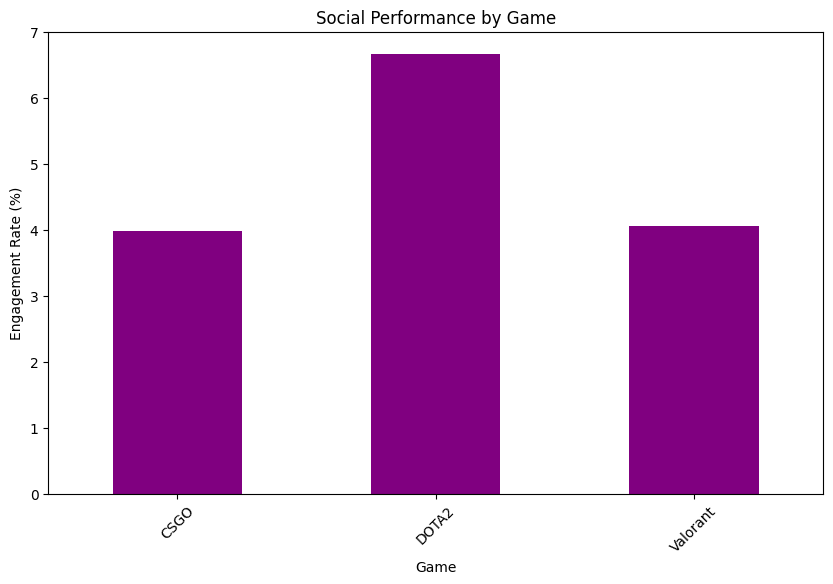

In [11]:
import matplotlib.pyplot as plt

# Plotting social performance by game
plt.figure(figsize=(10, 6))
performance_by_game['Engagement Rate'].plot(kind='bar', color='purple')
plt.xlabel('Game')
plt.ylabel('Engagement Rate (%)')
plt.title('Social Performance by Game')
plt.xticks(rotation=45)
plt.show()


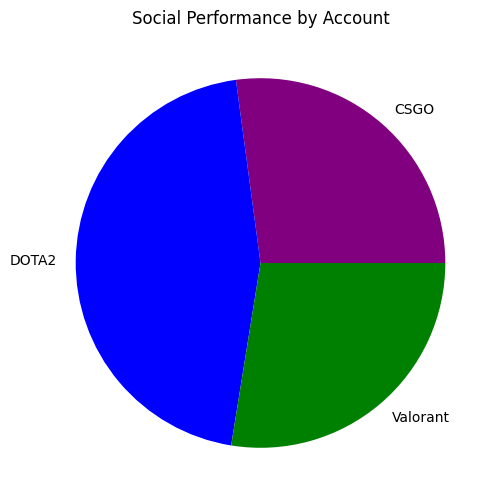

In [12]:
import matplotlib.pyplot as plt

# Plotting social performance by game (Pie chart)
plt.figure(figsize=(10, 6))
plt.pie(performance_by_game['Engagement Rate'], labels=performance_by_game.index, colors=['purple', 'blue', 'green', 'orange'])
plt.title('Social Performance by Account')
plt.show()


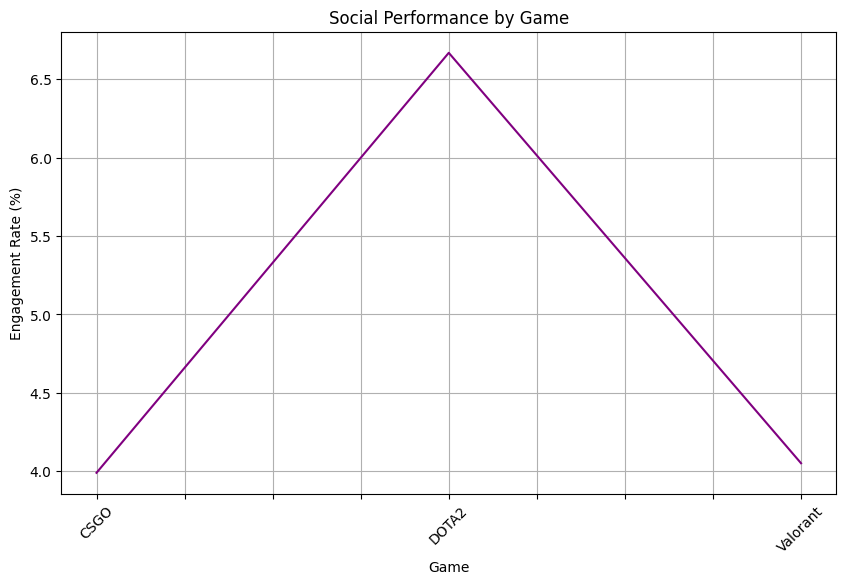

In [13]:
import matplotlib.pyplot as plt

# Plotting social performance by game (Line chart)
plt.figure(figsize=(10, 6))
performance_by_game['Engagement Rate'].plot(kind='line', color='purple')
plt.xlabel('Game')
plt.ylabel('Engagement Rate (%)')
plt.title('Social Performance by Game')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


4.What media type performs the best?

Mixed Media Type performs the best

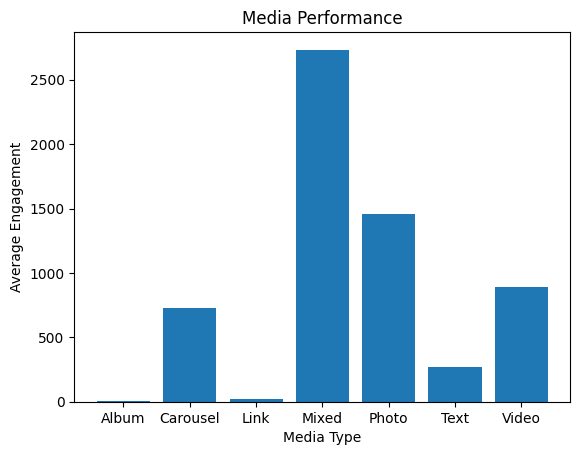

In [14]:


# Calculate media performance
media_performance = df.groupby('Media Type')['Total Engagements'].mean()

# Create a bar plot
plt.bar(media_performance.index, media_performance.values)
plt.xlabel('Media Type')
plt.ylabel('Average Engagement')
plt.title('Media Performance')
plt.show()


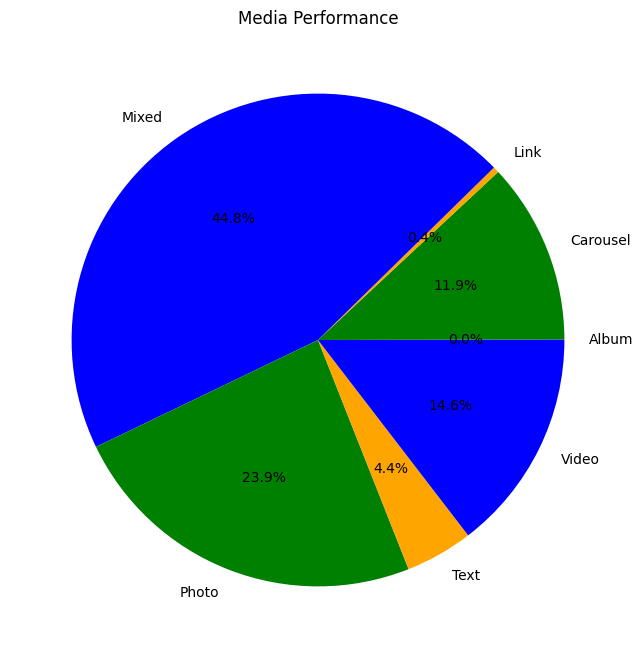

In [15]:
import matplotlib.pyplot as plt

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(media_performance.values, labels=media_performance.index, autopct='%1.1f%%', colors=['blue', 'green', 'orange'])
plt.title('Media Performance')
plt.show()


5.What is our best performing campaign?

Community Engagement is the best performing campaign

In [16]:
best_campaign = df.groupby('Campaign Name')['Total Engagements'].sum().idxmax()

print("Best performing campaign:", best_campaign)


Best performing campaign: Community Engagement 


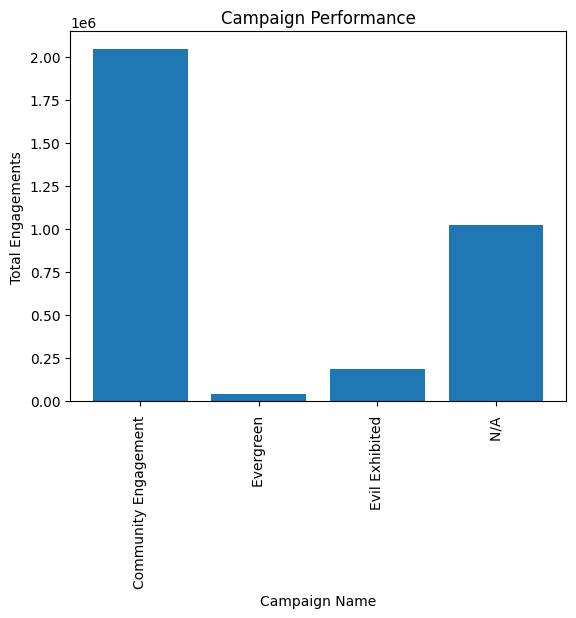

In [17]:
import matplotlib.pyplot as plt

# Calculate total engagements per campaign
campaign_engagements = df.groupby('Campaign Name')['Total Engagements'].sum()

# Identify the best performing campaign
best_campaign = campaign_engagements.idxmax()

# Create a bar plot
plt.bar(campaign_engagements.index, campaign_engagements.values)
plt.xlabel('Campaign Name')
plt.ylabel('Total Engagements')
plt.title('Campaign Performance')
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.show()
